In [1]:
from sklearn.decomposition import PCA 
import plotly.express as px
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

In [62]:
df = pd.read_csv("C:/mink/year3/Unsup/Group/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.shape

(167, 10)

In [7]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
X = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

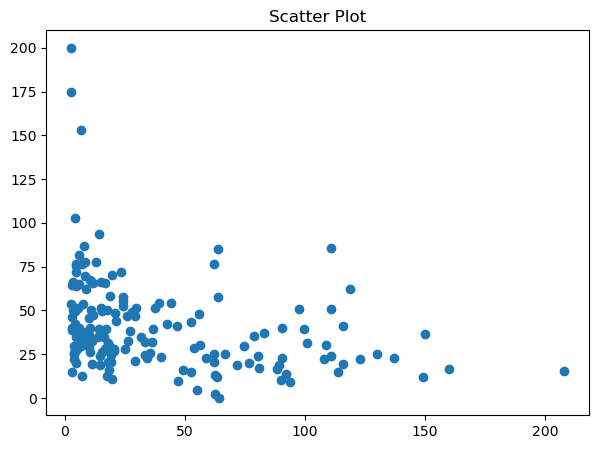

In [234]:
#กราฟแบบไม่PCA
fig = plt.figure(1,figsize=(7,5))
plt.clf
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.title('Scatter Plot')
plt.show()

In [15]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)

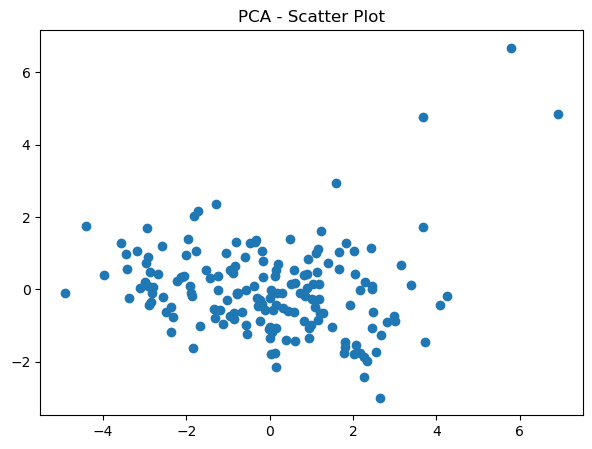

In [232]:
#กราฟแบบPCAแล้ว
fig = plt.figure(1,figsize=(7,5))
plt.clf
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.title('PCA - Scatter Plot')
plt.show()

In [25]:
pca.get_covariance()

array([[ 1.16531239, -0.3111418 , -0.28368587, -0.10975793, -0.61105768,
         0.2967787 , -0.70442981,  0.65622035, -0.61636599],
       [-0.3111418 ,  1.17935159, -0.00305269,  0.61327681,  0.43159488,
        -0.20757883,  0.29802383, -0.31953362,  0.38018312],
       [-0.28368587, -0.00305269,  0.62441504, -0.086454  ,  0.21548145,
        -0.10513128,  0.29501835, -0.2650383 ,  0.23023966],
       [-0.10975793,  0.61327681, -0.086454  ,  1.0598255 ,  0.25334777,
        -0.12100121,  0.09190287, -0.12765286,  0.20021146],
       [-0.61105768,  0.43159488,  0.21548145,  0.25334777,  1.06221226,
        -0.28373265,  0.61960869, -0.58879663,  0.57518304],
       [ 0.2967787 , -0.20757883, -0.10513128, -0.12100121, -0.28373265,
         0.61439191, -0.30100553,  0.28588365, -0.27898644],
       [-0.70442981,  0.29802383,  0.29501835,  0.09190287,  0.61960869,
        -0.30100553,  1.19836387, -0.67061382,  0.62698778],
       [ 0.65622035, -0.31953362, -0.2650383 , -0.12765286, -0

In [23]:
pca2 = PCA(n_components=9)
pca2.fit(X)
explained_variance_full=pca2.explained_variance_ratio_
explained_variance_full

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

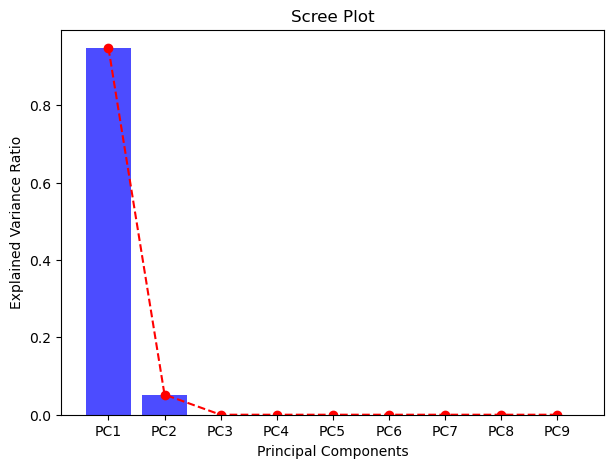

PCA(n_components=9)

In [230]:
#Scree Plot
plt.figure(figsize=(7, 5))
plt.bar(range(1, len(explained_variance_full) + 1), explained_variance_full, alpha=0.7, color='b')
plt.plot(range(1, len(explained_variance_full) + 1), explained_variance_full, marker='o', linestyle='--', color='r')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance_full) + 1), ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
plt.show()
pca2.fit(X)

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
km = kmeans.fit(scaled_data)

C:\Users\kanvu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\kanvu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


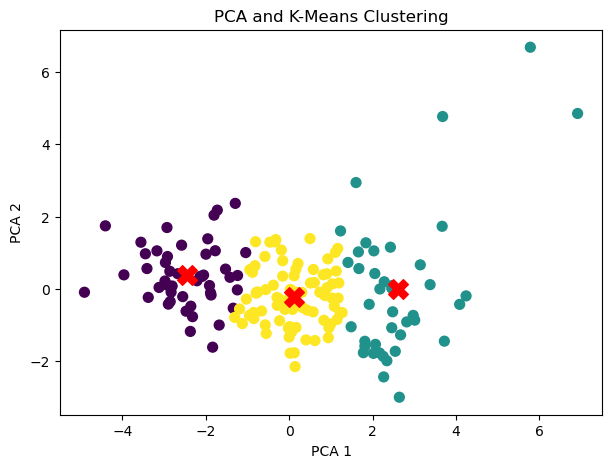

In [318]:
n_clusters = 3
modelK = KMeans(n_clusters=n_clusters)
modelK.fit(x_pca)

labels = modelK.labels_

#กราฟ K-means with PCA
plt.figure(figsize=(7, 5))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(modelK.cluster_centers_[:, 0], modelK.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA and K-Means Clustering')
plt.show()

In [319]:
dfkmeans = df
dfkmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


In [322]:
#เก็บ Cluster ในคอลัมน์ Cluster
dfkmeans['Cluster'] = km.labels_
dfkmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [324]:
dfk_c0 = dfkmeans[dfkmeans['Cluster'] == 0]
dfk_c0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0


In [326]:
dfk_c1 = dfkmeans[dfkmeans['Cluster'] == 1]
dfk_c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.6,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,1


In [328]:
dfk_c2 = dfkmeans[dfkmeans['Cluster'] == 2]
dfk_c2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2


In [330]:
#Hierarchical

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [332]:
df_H = pd.read_csv("C:/mink/year3/Unsup/Group/Country-data.csv")

In [334]:
X = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [336]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [338]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [340]:
df_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])

In [342]:
modelH = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = modelH.fit_predict(scaled_data)

In [344]:
df_H['Cluster'] = cluster_labels
df_H

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


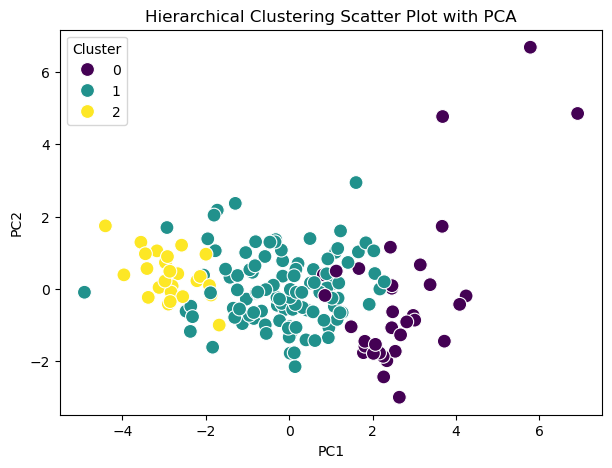

In [367]:
#กราฟ Hierachical with PCA
plt.figure(figsize=(7, 5))
sns.scatterplot(x='PC1', y='PC2', hue=df_H['Cluster'], palette='viridis', data=df_pca, s=100)
#plt.scatter(modelK.cluster_centers_[:, 0], modelK.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('Hierarchical Clustering Scatter Plot with PCA')
plt.show()

In [348]:
dfH_c0 = df_H[df_H['Cluster'] == 0]
dfH_c0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0


In [350]:
dfH_c1 = df_H[df_H['Cluster'] == 1]
dfH_c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1


In [352]:
dfH_c2 = df_H[df_H['Cluster'] == 2]
dfH_c2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2


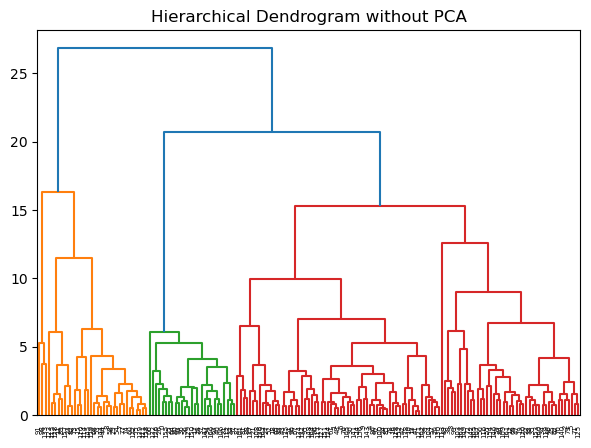

In [354]:
#Hierarchical Dendrogram without PCA
def plot_dendrogram(X):
    linked = linkage(X, 'ward')
    plt.figure(figsize=(7, 5))
    dendrogram(linked)
    plt.title('Hierarchical Dendrogram without PCA')
    plt.show()

plot_dendrogram(scaled_data)

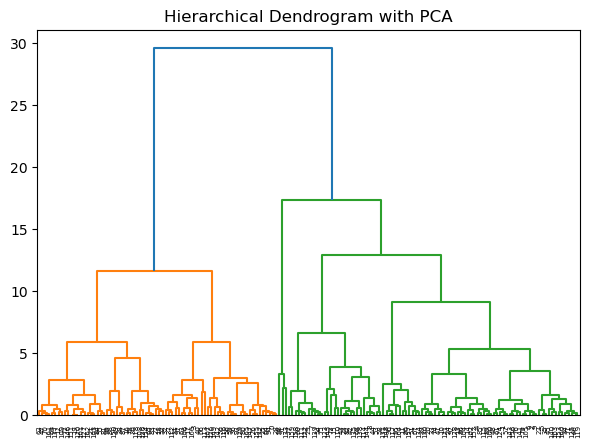

<function matplotlib.pyplot.show(close=None, block=None)>

In [355]:
#Hierarchical Dendrogram with PCA
def plot_dendrogram(pca2):
    linkage_data = linkage(pca2, 'ward')
    plt.figure(figsize=(7, 5))
    dendrogram(linkage_data)
    plt.title('Hierarchical Dendrogram with PCA')
    plt.show()

plot_dendrogram(x_pca)
plt.show

In [356]:
#DBSCAN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.8, min_samples=2).fit(x_pca)
print(db.labels_)
#print(y)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  1  0  0 -1 -1  0  0  0  0  0
  0  0  0  2  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0
  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


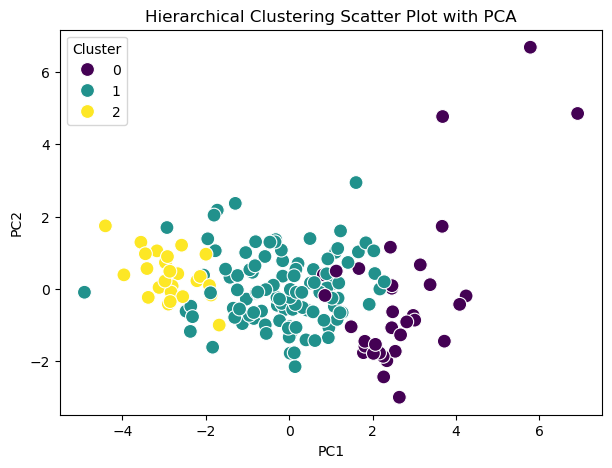

In [369]:
#กราฟ Hierachical with PCA
plt.figure(figsize=(7, 5))
sns.scatterplot(x='PC1', y='PC2', hue=df_H['Cluster'], palette='viridis', data=df_pca, s=100,)
#plt.scatter(modelK.cluster_centers_[:, 0], modelK.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('Hierarchical Clustering Scatter Plot with PCA')
plt.show()

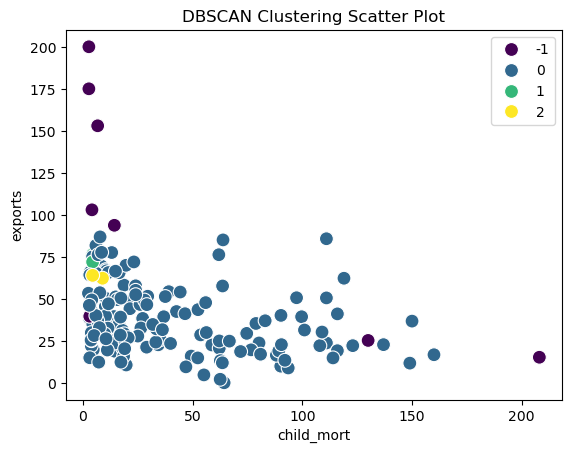

<Figure size 700x500 with 0 Axes>

In [371]:
#กราฟ DBSCAN without PCA
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=db.labels_, palette='viridis', s=100)
plt.title('DBSCAN Clustering Scatter Plot')
plt.figure(figsize=(7, 5))
plt.show()

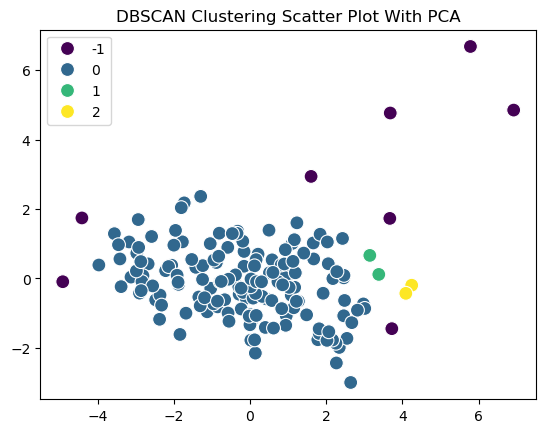

<Figure size 700x500 with 0 Axes>

In [373]:
#กราฟ DBSCAN with PCA
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=db.labels_, palette='viridis', s=100)
plt.title('DBSCAN Clustering Scatter Plot With PCA')
plt.figure(figsize=(7, 5))
plt.show()